# Day 08. Exercise 04
# Regression

## 0. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [8]:
df = pd.read_csv('../data/checker_regression.csv')
df = df.drop_duplicates(subset=['uid']).reset_index(drop=True)
df = df[['num_commits', 'pageviews', 'AVG(diff)']]
df = df.fillna(0)

X = df[['num_commits', 'pageviews']]
y = df["AVG(diff)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 824.0 bytes


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [9]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    test_rmses = []

    for train_idx, test_idx in kf.split(X):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        m = clone(model)
        m.fit(X_tr, y_tr)

        y_tr_pred = m.predict(X_tr)
        rmse_train = np.sqrt(mean_squared_error(y_tr, y_tr_pred))

        y_te_pred = m.predict(X_te)
        rmse_test = np.sqrt(mean_squared_error(y_te, y_te_pred))

        print(f"train -  {rmse_train}   |   test -  {rmse_test}")
        test_rmses.append(rmse_test)

    avg_rmse = float(np.mean(test_rmses))
    print(f"Average RMSE on crossval is {avg_rmse}")
    return avg_rmse

In [10]:
n_splits = 5
lr = LinearRegression()

dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=5,
    random_state=21
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=3,
    random_state=21,
    n_jobs=-1
)

crossval(n_splits, X, y, lr)

crossval(
    n_splits, X, y,
    dt
)

crossval(
    n_splits, X, y,
    rf
)

train -  63.13782454059868   |   test -  52.69818584468258
train -  58.52936923453279   |   test -  79.1236368892683
train -  59.95936162571005   |   test -  65.3810266869508
train -  64.09508895095567   |   test -  50.49199260444911
train -  56.09722108900308   |   test -  82.89345845461484
Average RMSE on crossval is 66.11766009599313
train -  46.07709793868691   |   test -  45.628993058784225
train -  46.45943986907713   |   test -  37.102790461155145
train -  38.18664540620487   |   test -  66.57951292796108
train -  47.66708821587636   |   test -  30.274887627757465
train -  40.8096674211694   |   test -  80.9171117917936
Average RMSE on crossval is 52.10065917349031
train -  45.32789590313969   |   test -  45.17371307434974
train -  45.333933673936514   |   test -  41.505584058925976
train -  39.4583288274756   |   test -  59.813590270398876
train -  45.58500571079418   |   test -  34.367358560085464
train -  40.52374340997876   |   test -  75.55592551350738
Average RMSE on cross

51.28323429545348

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [ ]:
models = {
    "LinearRegression": lr,
    "DecisionTreeRegressor": dt,
    "RandomForestRegressor": rf
}

preds = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds[name] = y_pred

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} | Test RMSE: {rmse}")

LinearRegression | Test RMSE: 52.69818584468258
DecisionTreeRegressor | Test RMSE: 45.628993058784225
RandomForestRegressor | Test RMSE: 45.296966880948816


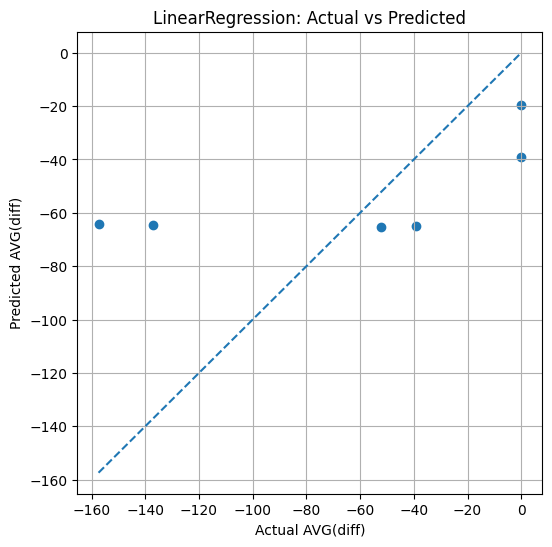

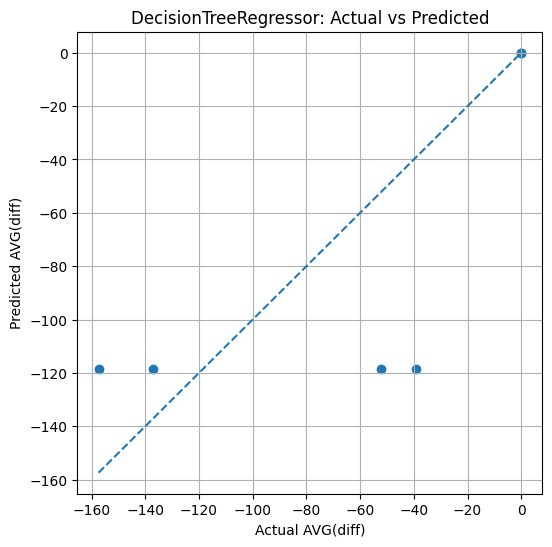

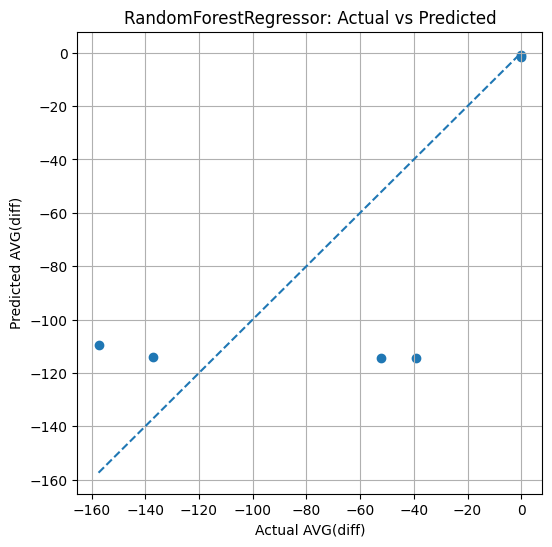

In [ ]:
for name, y_pred in preds.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual AVG(diff)")
    plt.ylabel("Predicted AVG(diff)")
    plt.title(f"{name}: Actual vs Predicted")

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

    plt.grid(True)
    plt.show()

# диагональ